In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
data=data.drop(columns=['Country','Region','Happiness Rank'], axis=1)
data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


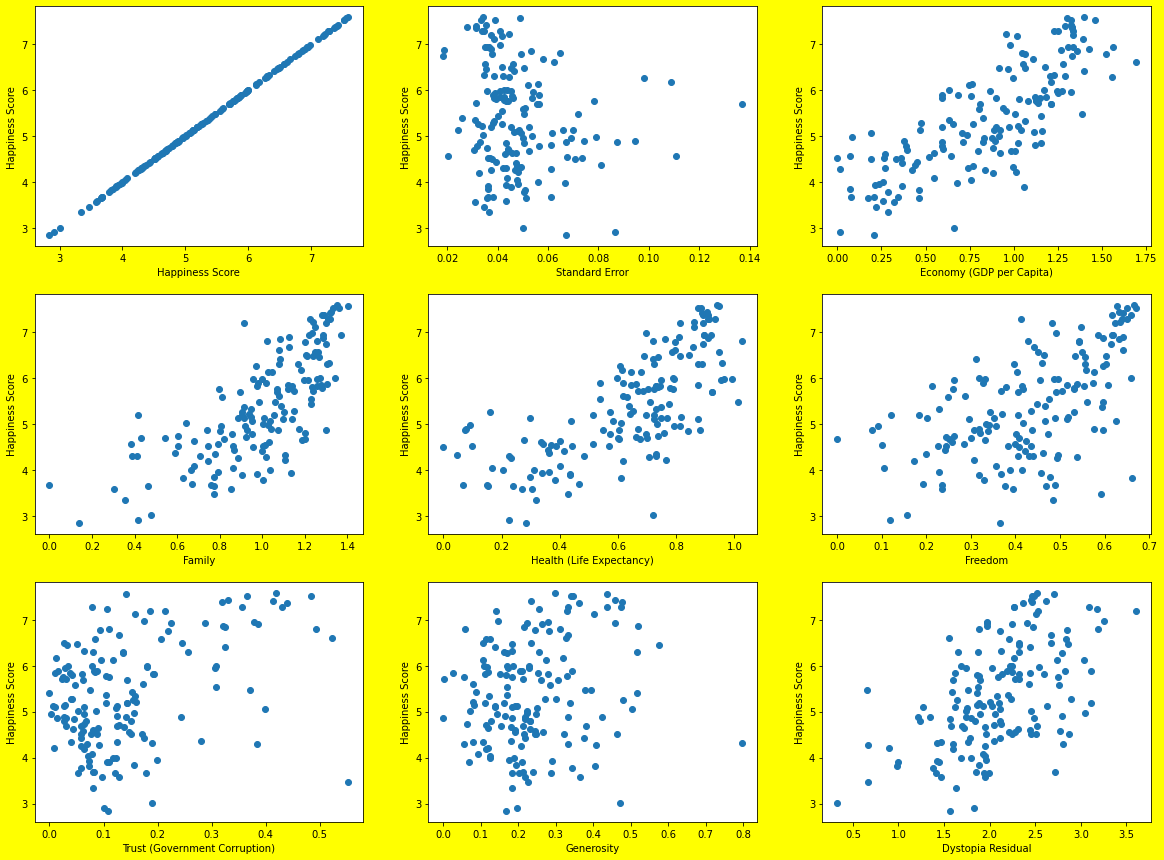

In [6]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(data[column],data["Happiness Score"])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Happiness Score', fontsize=10)
    plotnumber+=1
plt.show()

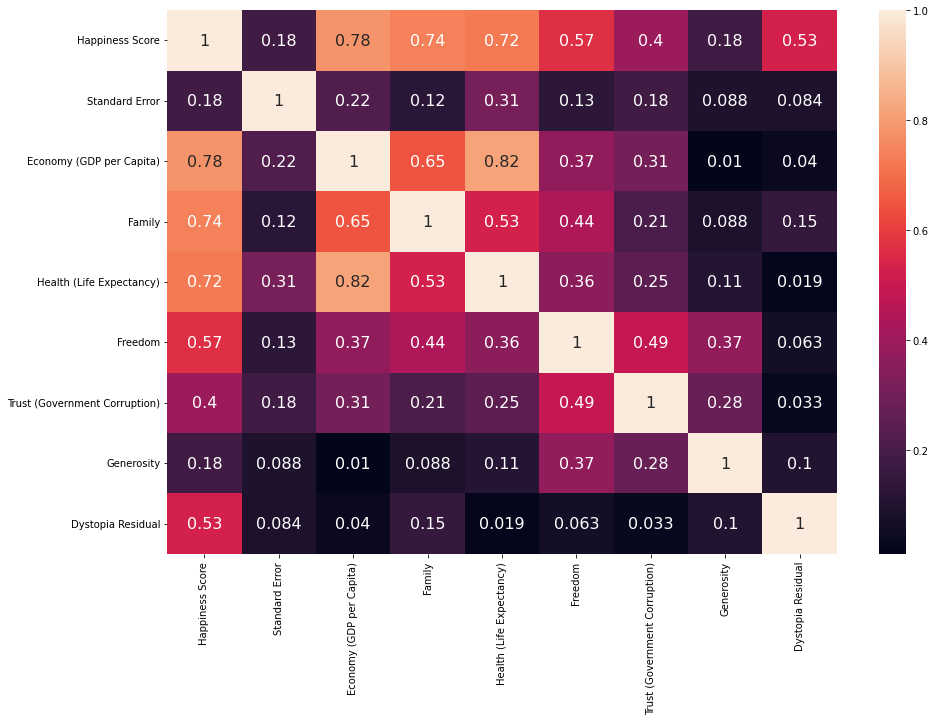

In [7]:
df_corr=data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True, annot_kws={'size':16})
plt.show()

In [8]:
#Now, let's split our data into features and label
x=data.drop(columns="Happiness Score", axis=1)
y=data["Happiness Score"]

In [9]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [11]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [12]:
x=pd.DataFrame(x_scaled, columns=x.columns)

In [13]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...
153,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((110, 8), (48, 8), (110,), (48,))

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
lr.score(x_test,y_test)

0.9999999287338206

In [19]:
y_pred=lr.predict(x_test)

In [20]:
y_pred

array([5.87832001, 4.25200169, 6.94022182, 3.68091808, 6.8529657 ,
       5.85521474, 6.3023989 , 4.55063577, 4.69401758, 5.60468545,
       5.88904703, 4.63349501, 4.97118896, 7.42689779, 5.79059598,
       4.35004199, 6.57408838, 5.82415308, 4.36921242, 4.51231532,
       7.18735849, 4.27065046, 6.2947794 , 5.75443951, 6.78626191,
       6.98261112, 7.28601752, 4.68561567, 7.4060377 , 5.71587923,
       5.69531649, 4.21849779, 6.90134361, 4.67739826, 5.54816231,
       7.58690259, 5.09760167, 5.36026777, 3.81920088, 4.60974565,
       4.85763053, 4.51790959, 4.79960426, 4.86722206, 6.75011312,
       4.03306412, 6.29817916, 6.41120152])

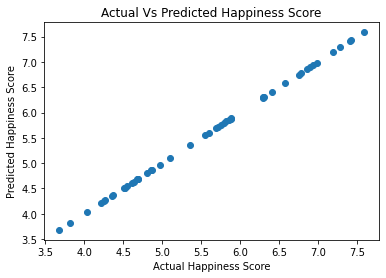

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual Vs Predicted Happiness Score")
plt.show()

In [22]:
mean_absolute_error(y_test,y_pred)

0.00024380847880470236

In [23]:
mean_squared_error(y_test,y_pred)

8.49151344487079e-08

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.00029140201517612724